In [1]:
import sys
workPath = '/home/jovyan/workspace'
if not workPath in sys.path:
    sys.path.append(workPath)

In [2]:
import numpy as np

from underworld import function as fn

import planetengine
mapping = planetengine.mapping
fieldops = planetengine.fieldops
visualisation = planetengine.visualisation
shapes = planetengine.shapes
pfn = planetengine.functions

In [3]:
IC = planetengine.initials.sinusoidal.build()
system = planetengine.systems.MS98.build(
    res = 32,
    f = 0.5,
    aspect = 1.,
    dither = 6,
    _initial_temperatureField = IC
    )
buoyancy = system.obsVars['temperature']
velMag = pfn.component.mag(system.obsVars['velocity'])
strainSecInv = fn.tensor.second_invariant(
    fn.tensor.symmetric(
        system.obsVars['velocity'].fn_gradient
        )
    )
rasterFns = [buoyancy, velMag, strainSecInv]

In [4]:
raster = visualisation.Raster(*rasterFns)

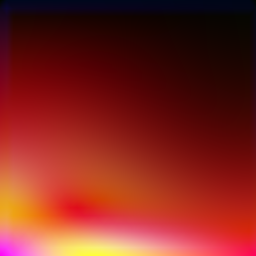

In [7]:
raster.img

In [ ]:
# myvar = pfn.convert(strainSecInv, 'strainSecInv')
# myvar = pfn.surface.outer(myvar)
# myvar = pfn.handlenan.zeroes(myvar)
# myvar = pfn.quantiles.quintiles(myvar)
# myvar = pfn.select.default(myvar, 5., 1.)
# myvar = pfn.handlenan.zeroes(myvar)
# myvar = pfn.binarise.default(myvar)
# myvar = pfn.integral.outer(myvar)
# myvar = pfn.integralpfn.quantiles.terciles(pfn.surface.outer(strainSecInv))

In [ ]:
for i in range(100):
    system.go(10)
    myraster.save('../out/test7', 'test', system.count)